In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator

Current

coefficient of determination: 0.9996153114891398
intercept: -7.516720252125317
slope: [0.01473662]


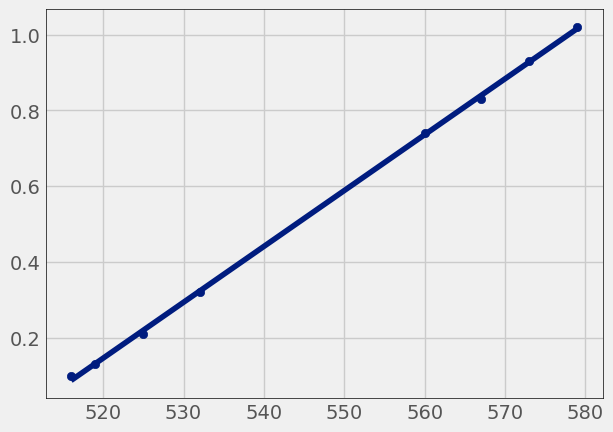

In [91]:
df = pd.read_csv('curr.csv')
x_current = df["analog"].to_numpy().reshape((-1, 1))
y_current = df["multimeter"].to_numpy()
model = LinearRegression()
model.fit(x_current, y_current)
model = LinearRegression().fit(x_current, y_current)
r_sq = model.score(x_current, y_current)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred_current = model.intercept_ + model.coef_ * x_current
plt.scatter(x_current, y_current)
plt.plot(x_current, y_pred_current)
plt.show()

In [115]:
noise = np.random.normal(0,10,17)
y_curr_dummy = np.array([
    4.8, 4.75, 4.5, 4.25, 4, 3.75, 3.5, 3.25, 3, 2.75, 2.5, 2.25, 2.0, 1.75, 1.5, 1.25, 1.0
])
x_curr_dummy = (y_curr_dummy - model.intercept_)/model.coef_
x_final_dummy = x_curr_dummy + noise
print(x_final_dummy.astype(int))

[823 835 813 790 764 770 725 752 722 699 672 670 642 609 619 601 580]


In [93]:
y_final_dummy = model.intercept_ + model.coef_ * x_final_dummy
y_final_dummy

array([4.93069172, 4.8495926 , 4.59371978, 4.32017337, 4.06035974,
       3.4985639 , 3.46433113, 3.08941463, 3.00176378, 2.79227149,
       2.37686339, 2.219966  , 1.94857048, 1.82372283, 1.58201669,
       1.10158391, 0.90239072])

In [94]:
values = {
    'multimeter' : [],
    'analog': []
}

for i in df['multimeter'].to_list():
    values['multimeter'].append(i)

for i in y_final_dummy:
    values['multimeter'].append(i)

for i in df['analog'].to_list():
    values['analog'].append(i)

for i in x_final_dummy.astype(int):
    values['analog'].append(i)


df_dummy = pd.DataFrame(values)
df_dummy = df_dummy.sort_values(by=['multimeter'])
df_dummy.head()

,multimeter,analog
7,0.10,516.0
6,0.13,519.0
5,0.21,525.0
4,0.32,532.0
3,0.74,560.0


voltage

voltage coefficient of determination: 0.9998822429220275
voltage intercept: 11.832933325629766
votlage slope: [-0.02460968]


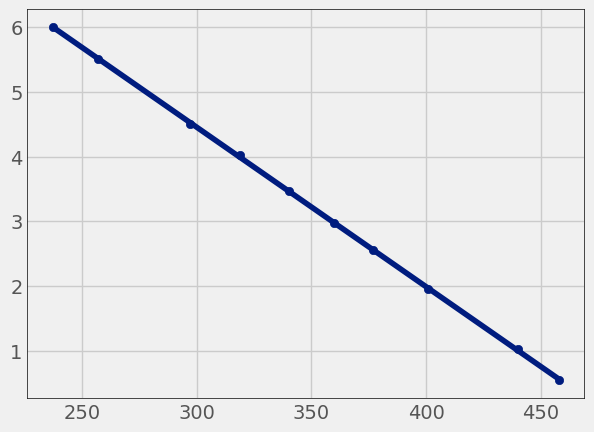

In [114]:
df_volt = pd.read_csv('volt.csv')
x_voltage = df_volt["analog"].to_numpy().reshape((-1, 1))
y_voltage = df_volt["multimeter"].to_numpy()
model_volt = LinearRegression()
model_volt.fit(x_voltage, y_voltage)
model_volt = LinearRegression().fit(x_voltage, y_voltage)
r_sq = model_volt.score(x_voltage, y_voltage)
print(f"voltage coefficient of determination: {r_sq}")
print(f"voltage intercept: {model_volt.intercept_}")
print(f"votlage slope: {model_volt.coef_}")

y_pred_voltage = model_volt.intercept_ + model_volt.coef_ * x_voltage
plt.scatter(x_voltage, y_voltage)
plt.plot(x_voltage, y_pred_voltage)
plt.show()

coefficient of determination: 0.9999871838817919
intercept: -7.526467421851551
slope: [0.01475933]
coefficient of determination: 0.9998822429220275
intercept: 11.832933325629766
slope: [-0.02460968]


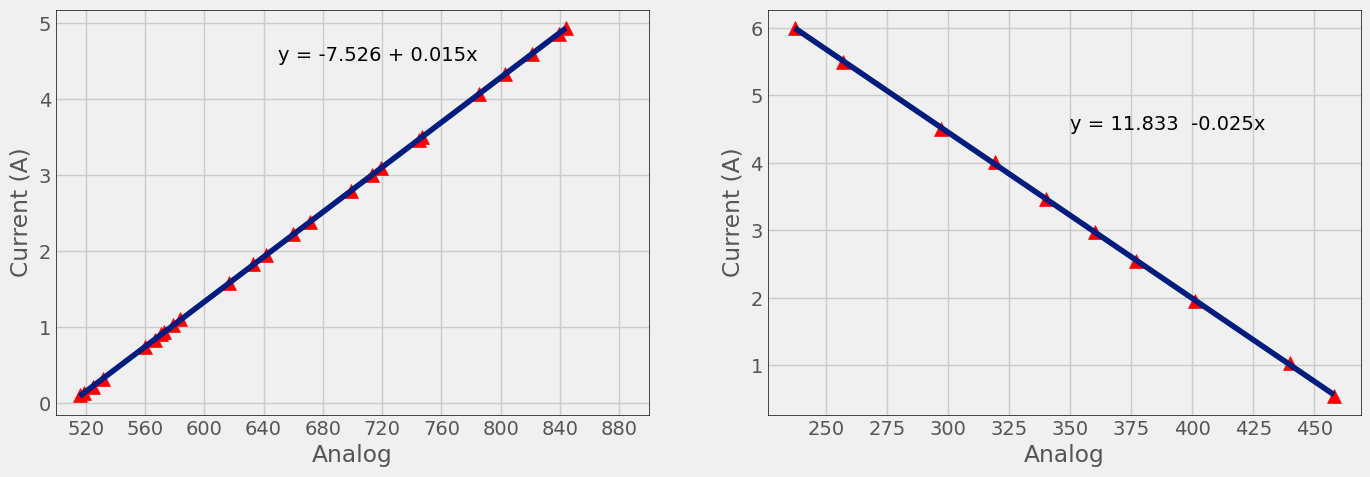

In [122]:

plt.style.use('seaborn-dark-palette')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5

fig = plt.figure(figsize=(15, 5))
plt.tight_layout()
curr = fig.add_subplot(121)
volt = fig.add_subplot(122)

# Current
curr.set_xlim(500,900)
curr.xaxis.set_major_locator(MaxNLocator(prune='lower'))
x_current = df_dummy["analog"].to_numpy().reshape((-1, 1))
y_current = df_dummy["multimeter"].to_numpy()
model_cur = LinearRegression()
model_cur.fit(x_current, y_current)
model_cur = LinearRegression().fit(x_current, y_current)
r_sq = model_cur.score(x_current, y_current)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_cur.intercept_}")
print(f"slope: {model_cur.coef_}")
y_pred_current = model.intercept_ + model_cur.coef_ * x_current

curr.plot(x_current,y_pred_current)
curr.scatter(df_dummy['analog'], df_dummy['multimeter'], marker='^', c='r', s=100)
curr.set_xlabel('Analog')
curr.set_ylabel('Current (A)')
msg_curr = (f"y = {round(model_cur.intercept_,3)} + {round(model_cur.coef_[0], 3)}x")
curr.text(650, 4.5, msg_curr, math_fontfamily='cm')

# Voltage
volt.xaxis.set_major_locator(MaxNLocator(prune='lower'))
x_votage = df_volt["analog"].to_numpy().reshape((-1, 1))
y_voltage = df_volt["multimeter"].to_numpy()
model_v = LinearRegression()
model_v.fit(x_votage, y_voltage)
model_v = LinearRegression().fit(x_votage, y_voltage)
r_sq = model_v.score(x_votage, y_voltage)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_v.intercept_}")
print(f"slope: {model_v.coef_}")
y_pred_voltage = model_v.intercept_ + model_v.coef_ * x_votage

volt.plot(x_votage,y_pred_voltage)
volt.scatter(df_volt['analog'], df_volt['multimeter'], marker='^', c='r', s=100)
volt.set_xlabel('Analog')
volt.set_ylabel('Current (A)')
msg = (f"y = {round(model_v.intercept_,3)}{round(model_v.coef_[0], 3)}x")
volt.text(350, 4.5, msg, math_fontfamily='cm')

plt.show()